In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
from scipy import stats


In [2]:
data = pd.read_csv('car_data_all_together.csv')

In [3]:
newdata = data.sort_values(by="aspiration", ascending=False)
newdata1 = newdata.iloc[:100]
newdata1["aspiration"].value_counts()

std      63
turbo    37
Name: aspiration, dtype: int64

# One categorical - One sample proportion test - Z-test
<img src="onecat.png">

In [4]:
from statsmodels.stats.proportion import proportions_ztest
# Is there difference in the number of gas and diesel in our dataset?
# H0 There is not a difference in distribution
# Ha There is a difference in distribution

# H0: p = p0 (population proportion is equal to hypothesized proportion p0)

# The alternative hypothesis can be either two-tailed, left-tailed, or right-tailed:
# H1 (two-tailed) alternative="two-sided": p ≠ p0 (population proportion is not equal to some hypothesized value p0)
# H1 (left-tailed) alternative="smaller": p < p0 (population proportion is less than some hypothesized value p0)
# H1 (right-tailed) alternative="larger": p > p0 (population proportion is greater than some hypothesized value p0)

obs = newdata1["aspiration"].value_counts()
obs 
#There were 63 std and 37 turbo charged cars in our dataset.

std      63
turbo    37
Name: aspiration, dtype: int64

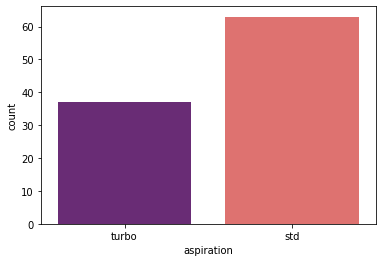

In [5]:
sns.countplot(x="aspiration", data=newdata1, palette="magma")
plt.show()

In [6]:
# Let's use the first category as 'success' and store them under a separate name:
x = obs[0]
print("The count of std (first category) is: ",x)

The count of std (first category) is:  63


In [7]:
# The value_counts returns a python series, so we can get the sum of values by using Python's sum function:
n = sum(obs.values)
print("The total count is: ",n)

The total count is:  100


In [8]:
# Let's set the expected proportions to be 0.5.
p0 = 0.5
print("The expected proportion is: ", p0)

The expected proportion is:  0.5


In [9]:
# The function requires the number of successes, the sample size, the expected proportion and also set prop_var to this expected proportion. I want a two-sided test, so all together.
zvalue, pvalue = proportions_ztest(count=x, nobs=n, value=p0, prop_var=p0, alternative="two-sided")
# The first value is the z-value, the second is the p-value (significance)
# and we can conclude that there is a significant difference between the proportions of the two categories.
# The 0.00932 (p-value) is the probability of obtaining a z-value of 2.6 or more extreme if the assumption about the fueltype (the expected proportion of 0.5) was true.
print("The z-value of one sample proportion test is: ", zvalue)
print("The p-value of one sample proportion test is: ", round(pvalue, 5))

The z-value of one sample proportion test is:  2.6
The p-value of one sample proportion test is:  0.00932


# Two categorical - Chi-squared test of independence (Pearson chi square test)
<img src="twocat.png">

In [10]:
from scipy.stats import chi2_contingency
# Does the proportion of std an turbo differ across fueltype groups?
# H0 Aspiration is not dependent on fueltype.
# Ha Aspiration is dependent on fueltype.

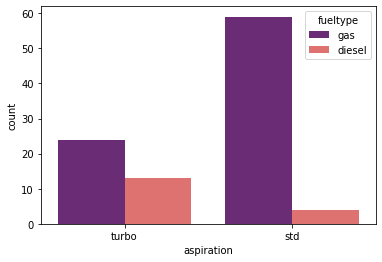

In [11]:
sns.countplot(x="aspiration", data=newdata1, palette="magma", hue="fueltype")
plt.show()

In [12]:
crosstab = pd.crosstab(newdata1["aspiration"], newdata1["fueltype"])
crosstab

fueltype,diesel,gas
aspiration,,
std,4,59
turbo,13,24


In [13]:
# The function requires the number of successes, the sample size, the expected proportion and also set prop_var to this expected proportion. I want a two-sided test, so all together.
chiVal, pVal, df, exp = chi2_contingency(crosstab)
# As the p-value is lower than alpha we can conclude that aspiration type is dependent on fuel type.
# The first value is the chi-square value of 11.72503. The chance of such a value or even more extreme, in a sample, if there is no association in the dataset is 0.00062 (p-value).
# The second value is p-value (0.00062). It is considered 'significant' usually if this value is below 0.05, which in this case it is. This indicates an association between the two variables. (One has an impact on the other.)
# The third value is the degrees of freedom, which is an indication of the size of the table, since it is simply the number of rows -1, times the number of columns - 1.
# The forth values are the expected values. There are the counts to be expected if the two variables had no influence on each other. 
# (Note that as a criteria the lowest expected value should be at least 1, and not too many should be below 5. Often a threshold of 20% is used (so if more than 20% of the cells have an expected count of 5 or less, the test is not reliabe to use.))
print("The chi-square value of chi-square test is: ", round(chiVal,5))
print("The p-value of chi-square test is: ", round(pVal,5))
print("The degrees of freedom of chi-square test is: ", df)
print("The expected values of chi-square test is: ", exp)

The chi-square value of chi-square test is:  11.72503
The p-value of chi-square test is:  0.00062
The degrees of freedom of chi-square test is:  1
The expected values of chi-square test is:  [[10.71 52.29]
 [ 6.29 30.71]]


In [14]:
# Concatenate values in both lists into one list.
exp1 = np.concatenate((exp[0], exp[1]))
exp1

array([10.71, 52.29,  6.29, 30.71])

In [15]:
# Check the first lowest expected value.
print("The lowest expected value is: ", exp.min())
# Check the percentage of cells with a count of less than 5.
print("The percentage of cells with a count of less than 5: ", len(exp1[exp1 < 5])/(len(exp1))*100)

The lowest expected value is:  6.29
The percentage of cells with a count of less than 5:  0.0


In [16]:
students = [(2, 8, 2), (2, 6, 4), (0, 1, 1)]
podniky = pd.DataFrame(students, columns=["A", "B", "C"])
podniky.values.sum()

for i in ["A", "B", "C"]:
    podniky[i+"%"] = round((podniky[i]/26)*100, 1)

podniky.drop(columns=["A", "B", "C"], inplace=True)

podniky

stats.chi2_contingency(podniky)

(6.4802346882456145,
 0.16604002590822953,
 4,
 array([[ 7.1148, 26.6574, 12.4278],
        [ 7.1148, 26.6574, 12.4278],
        [ 1.1704,  4.3852,  2.0444]]))

In [17]:
stats.chi2_contingency(podniky)

(6.4802346882456145,
 0.16604002590822953,
 4,
 array([[ 7.1148, 26.6574, 12.4278],
        [ 7.1148, 26.6574, 12.4278],
        [ 1.1704,  4.3852,  2.0444]]))

# Pearson Chi-Square Goodness-of-Fit Test

In [18]:
# A Pearson chi-square Goodness of Fit test can be used to determine if one or more of the observed counts is significantly
# different from the expected counts. It can be seen as 'omnibus test', since it will not show which one is different.
# It is therefor often  followe by a so-called post-hoc test to find whic category or categories were different, or even diff from eachother.
# One thing to note is that not too many cells should have a low expected count.

In [19]:
# The column we are interested in.
dwh = newdata1["drivewheel"]
dwh1 = dwh.value_counts()

In [20]:
# Is there a significant difference between the observed and the expected value?
# H0 There is not significant difference between the observed and the expected value.
# Ha There is a significant difference between the observed and the expected value.

# Pearson chi-square Goodness of Fit test is done easily by chisquare function from scipy stats.
chi2g, chi2gpval = stats.chisquare(f_obs=dwh1)
# The first value is the chi-square value itself, the second value is p-value. It is the chance of a chi-square value like this or even more extreme if in the dataset the observed frequencies would have been equal to the expected frequencies.
print("Chi-square value is: ", chi2g)
print("The p-value is: ", chi2gpval)

Chi-square value is:  37.519999999999996
The p-value is:  7.122550210643063e-09


In [21]:
expectedcount = sum(dwh1)/len(dwh1)
print("Expected counts per category:",expectedcount)

Expected counts per category: 33.333333333333336


In [22]:
yes = pd.DataFrame({"A":[2,4,6],"B":[1,3,5],"C":[12,14,16],})

In [23]:
yes["sums"] = yes.sum(axis=1)

In [24]:
yes.loc["Total"] = yes[["A","B","C","sums"]].sum()

In [25]:
yes

,A,B,C,sums
0,2,1,12,15
1,4,3,14,21
2,6,5,16,27
Total,12,9,42,63


In [26]:
# Expected values per value are calculated as (sum of row * sum of column)/Grand Total
# For 0A it is (15*12)/63 = 2,857
# For 0B it is (15*9)/63 = 2,1428
# For 0C it is (15*42)/63 = 10

# One numeric - T-test
<img src="onenum1.png">

In [27]:
from scipy.stats import ttest_1samp
# Is the average price of cars different from the previously estabilished average price of cars?
# H0 There is not a difference.
# Ha There is a difference.

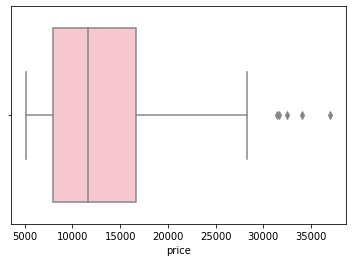

In [28]:
sns.boxplot(x="price", data=newdata1, color="pink")
plt.show()

In [29]:
# We need to set a hypothesized mean (the mean we'd like to test, or the mean we'd expect in the population). In this example I'd like to test if the price would be 11900.
hmean = 11900

In [126]:
newdata1["price"].mean()

13525.28667

In [131]:
# As the p-value is lower than alpha we can conclude that average price of cars in dataset is different from the previously estabilished average price of cars.
# The first value is the t-test value, the second value is the p-value.
ttest, ttestpvaulue = ttest_1samp(newdata1["price"], hmean)
print("The t-value of t-test is: ", round(ttest,5))
print("The p-value of t-test is: ", ttestpvaulue)

The t-value of t-test is:  2.34297
The p-value of t-test is:  0.021131204696073953


# One numeric and one categorical - T-test or ANOVA
<img src="onenumonecat.png">

## Two sample T-test

In [31]:
from scipy.stats import ttest_ind
# Is there a difference in price between standard and turbo charged cars?
# H0 There is not a difference.
# Ha There is a difference.

<AxesSubplot:xlabel='price', ylabel='aspiration'>

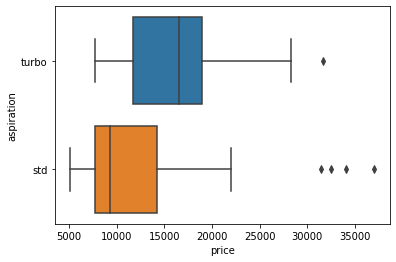

In [32]:
sns.boxplot(y="aspiration", x="price", data=newdata1)

In [33]:
# Binary field = aspiration and numerical field = price.
onecat = newdata1["aspiration"]
onenum = newdata1["price"]
# We need to separate the scores for each category. We can create a list with booleans (true/false) for each category:
cat1 = onecat == "std"
cat2 = onecat == "turbo"

In [34]:
# These we can use to select the scores of each category and store them separately, then immediately drop any missing values with dropna function.
cat1scores = onenum[cat1].dropna()
cat2scores = onenum[cat2].dropna()

In [35]:
# For the Student version, we cam simply enter the two lists with scores:
# Student's t-test assumes that the sample means being compared for two populations are normally distributed
# and that the populations have equal variances
t2tests, t2testpvaulues = ttest_ind(cat1scores, cat2scores)
print("The t-value of two sample t-test is: ", round(t2tests,5))
print("The p-value of two sample t-test is: ", t2testpvaulues)

The t-value of two sample t-test is:  -3.20346
The p-value of two sample t-test is:  0.0018322658915423179


In [36]:
# For the Welch version, we add the 'equal_var=False'
# Welch's t-test is designed for unequal population variances,
# but the assumption of normality is maintained.
# The first value is the t-value used, the second is the chance of such a t-value or even more extreme, if the assuption
# about the population would be true (p-value). In this case the chance is 0.00183 to 0.00137, depending on Student/Welch.
t2testw, t2testpvauluew = ttest_ind(cat1scores, cat2scores, equal_var=False)
print("The t-value of two sample t-test is: ", round(t2testw,5))
print("The p-value of two sample t-test is: ", t2testpvauluew)

The t-value of two sample t-test is:  -3.31156
The p-value of two sample t-test is:  0.0013727729912793116


In [37]:
# USING PINGOUN
import pingouin as pg
pg.ttest(cat1scores, cat2scores)
# The result is the same as with the above Welch version using scipy.

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-3.311563,83.394578,two-sided,0.001373,"[-7044.74, -1758.06]",0.663512,23.737,0.887235


## One-way ANOVA

In [38]:
# Often used to determin if there are differences in means between different categories. 
# ANOVA is short for Analysis of Variances, since to determine if the means are different and investigation in different variances is used.

# Is there a difference in price between cars with different cylinders?
# H0 There is not a difference.
# Ha There is a difference.

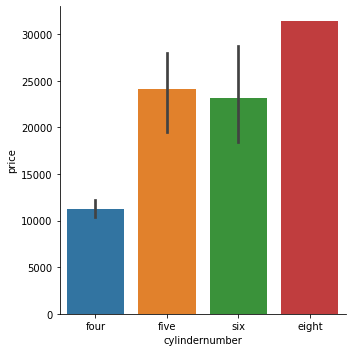

In [39]:
sns.catplot(x="cylindernumber", y="price", kind ="bar", data=newdata1)

In [40]:
# USING PINGOUN
import pingouin as pg
# This asks for the dv (dependent  variable), which is scale variable.
# between which is the variable with categories
# If we want to see the results in dataframe then detailed=True
anv = pg.anova(dv="price", between="cylindernumber", data=newdata1, detailed=True)
anv
# The most important result is probably the p-unc (this is the p-value also known as significance),
# it is the chance of an F-value or even more extreme, if the assumption about the population would be true.
# The assumption is that all the categories have the same mean in the dataset.
# With a p-value way below the usual threshold of 0.05, we therefore conclude that the cylinder number 
# has a significant influence on the mean price.

,Source,SS,DF,MS,F,p-unc,np2
0,cylindernumber,2.451565e+09,3,8.171885e+08,33.92718,4.879907e-15,0.514616
1,Within,2.312308e+09,96,2.408654e+07,NaN,NaN,NaN


# Two numerical - Correlation test
<img src="twonum.png">

In [41]:
# The most commonly used measure to test if linear relation exists between two scale variables is the Pearson Correlation Coefficient.
# PC varies between -1 and +1. If it is -1 there is a perfect negative linear relationship, 0 no relationship, +1 positive linear r.
# Positive relationship means if one variable goes up, the other goes up, negative is opposite trend.

# Is there a relationship between price and engine size?
# H0 There is not a relationship.
# Ha There is a relationship. 

In [42]:
# We can use the pandas library with its built function, in which we don't get the important p-value, but with the option of more than 2 columns.
newdata1[["price", "enginesize", "carlength"]].corr()

,price,enginesize,carlength
price,1.000000,0.859571,0.551936
enginesize,0.859571,1.000000,0.560839
carlength,0.551936,0.560839,1.000000


In [43]:
# To get the p-value with the correlation coefficient we have to use for example scipy stats and its pearsonr function.
cc, cpvalue = stats.pearsonr(newdata1["price"], newdata1["enginesize"])
print("The Pearson correlation coefficient is: ", round(cc,5))
print("The p-value is: ", cpvalue)

The Pearson correlation coefficient is:  0.85957
The p-value is:  2.488847911533779e-30


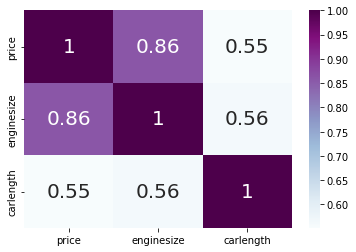

In [44]:
sns.heatmap(newdata1[["price","enginesize", "carlength"]].corr(), annot=True, annot_kws={"size":20}, cmap="BuPu")
plt.show()

In [45]:
j = [14, 22, 25, 28, 30]
k = [23.8, 23.8, 23.8, 23.8, 23.8]

In [46]:
stats.chisquare(f_obs=j, f_exp=k)

Power_divergenceResult(statistic=6.588235294117648, pvalue=0.15931505648894703)

In [47]:
stats.chi2_contingency(pd.crosstab(newdata1["carbody"], newdata1["aspiration"], normalize="all"))

(0.019225489813725107,
 0.9999540925912066,
 4,
 array([[0.0126, 0.0074],
        [0.0189, 0.0111],
        [0.2142, 0.1258],
        [0.2772, 0.1628],
        [0.1071, 0.0629]]))

In [48]:
pd.crosstab(newdata1["carbody"], newdata1["aspiration"], normalize="all")

aspiration,std,turbo
carbody,,
convertible,0.02,0.00
hardtop,0.02,0.01
hatchback,0.21,0.13
sedan,0.26,0.18
wagon,0.12,0.05


In [49]:
observed = [71,18,4]
reality = [579349, 14993, 2739]

In [50]:
observeddf = pd.DataFrame(observed)
realitydf = pd.DataFrame(reality)

In [51]:
realitydf["%"] = (realitydf[0]/597171)

In [52]:
realitydf

,0,%
0,579349,0.970156
1,14993,0.025107
2,2739,0.004587


In [53]:
maindf = pd.DataFrame()

In [54]:
maindf["Ei"] = observeddf[0]
maindf["Ti"] = round(realitydf["%"] * 93)

In [55]:
maindf["ABS(Ei-Ti)"] = abs(maindf["Ei"] - maindf["Ti"])
maindf["^2"] = abs(maindf["Ei"] - maindf["Ti"])**2
maindf["/Ti"] = (abs(maindf["Ei"] - maindf["Ti"])**2)/maindf["Ti"]


In [56]:
maindf["/Ti"].replace({np.inf:0}, inplace=True)

In [57]:
maindf

,Ei,Ti,ABS(Ei-Ti),^2,/Ti
0,71,90.0,19.0,361.0,4.011111
1,18,2.0,16.0,256.0,128.000000
2,4,0.0,4.0,16.0,0.000000


In [58]:
print("Chi-square value is: ", maindf["/Ti"].sum())
print("Critical value based on Df=2: ", 5.99)
print("Chi-square is larger than critical value so we reject H0.")

Chi-square value is:  132.01111111111112
Critical value based on Df=2:  5.99
Chi-square is larger than critical value so we reject H0.


In [59]:
stats.chisquare(f_obs=[102,90,66,42])

Power_divergenceResult(statistic=28.32, pvalue=3.1115137804306093e-06)

# Proportion Z-test

In [62]:
# Is the ditribution in our dataset different than what we expect?
# H0 There is not a difference.
# H0 There is a difference.
newdata1["drivewheel"].value_counts()

fwd    58
rwd    34
4wd     8
Name: drivewheel, dtype: int64

In [63]:
rwd = newdata1["drivewheel"].value_counts()[1]

In [65]:
newdata1["drivewheel"].value_counts().sum()

100

In [93]:
zzz, ppp = proportions_ztest(count=rwd, nobs=newdata1["drivewheel"].value_counts().sum(), value=0.4, alternative="two-sided")

if ppp < 0.05:
    print("Reject the null hypothesis as p-value is smaller than significance alpha 0.05 - ", ppp)
else:
    print("Fail to reject the null hypothesis as p-value is larger than significance alpha 0.05 - ", ppp)

Fail to reject the null hypothesis as p-value is larger than significance alpha 0.05 -  0.20529799730252218


# Chi-square Independance

In [104]:
# Is the aspiration of a car differenct across the car body types?
# H0 There is not a difference.
# H0 There is a difference.
jkk = pd.crosstab(newdata["carbody"], newdata1["aspiration"])

In [102]:
jkk

carbody,convertible,hardtop,hatchback,sedan,wagon
aspiration,,,,,
std,2,2,21,26,12
turbo,0,1,13,18,5


In [111]:
aa, bb, cc, dd = stats.chi2_contingency(jkk)
print("Chi-square value = ", aa)
print("P-value = ", bb)
print("Df = ", cc, " = 9,488")
print("Expected values = ", dd)
if aa > 9.488:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis based on chi-square value")
if bb < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis based on P-value")

Chi-square value =  1.9225489813725103
P-value =  0.7500015705293386
Df =  4  = 9,488
Expected values =  [[ 1.26  0.74]
 [ 1.89  1.11]
 [21.42 12.58]
 [27.72 16.28]
 [10.71  6.29]]
Fail to reject the null hypothesis based on chi-square value
Fail to reject the null hypothesis based on P-value


# T-test one sample

In [136]:
# Is there a difference between the average price of cars and the average price of cars from 2010?
# H0 There is not a difference.
# H0 There is a difference.
ee, ff = stats.ttest_1samp(newdata1["price"], popmean=11500)
print("T-value = ", ee)
print("P-value = ", ff)
if ff < 0.05:
    print("Reject the null hypothesis based on P-value")
else:
    print("Fail to reject the null hypothesis based on P-value")

T-value =  2.9196042624192557
P-value =  0.004339485801476046
Reject the null hypothesis based on P-value


# Two sample T-test

In [191]:
# Is there a difference in horsepower between different fuel types?
# H0 There is not difference.
# Ha There is a difference.
categorical = newdata1["fueltype"]
numeric = newdata1["horsepower"]

In [192]:
category1 = categorical == "gas"
category2 = categorical == "diesel"

In [193]:
categ1 = numeric[category1]
categ2 = numeric[category2]

In [194]:
gg, hh = stats.ttest_ind(categ1, categ2)
print("T-value = ", gg)
print("P-value = ", round(hh,6))
if hh < 0.05:
    print("Reject the null hypothesis based on P-value")
else:
    print("Fail to reject the null hypothesis based on P-value")

T-value =  2.287143063272177
P-value =  0.024338
Reject the null hypothesis based on P-value


# ANOVA

In [195]:
# Is the price of a car different across the car body types?
# H0 There is not difference in price.
# Ha There is a difference in price.
pg.anova(dv="horsepower", between="fueltype", data=newdata1, detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,fueltype,8534.085053,1,8534.085053,5.231023,0.024338,0.050673
1,Within,159880.824947,98,1631.436989,NaN,NaN,NaN


# Correlation - Pearson correlation coefficient

In [196]:
# Is there a correlation between price of the car and mileage per gallon in city?
# H0 There is not correlation.
# Ha There is a correlation.
jj, kk = stats.pearsonr(newdata1["price"], newdata1["citympg"])
print("PCC value = ", jj)
print("P-value = ", round(kk,6))
if jj >= 0.5:
    print("Strong positive correlation")
elif jj <= -0.5:
    print("Strong negative correlation")
else:
    print("Slight positive/negative correlation")
    print("Fail to reject the null hypothesis based on P-value")
if kk < 0.05:
    print("Reject the null hypothesis based on P-value")
else:
    print("Fail to reject the null hypothesis based on P-value")

PCC value =  -0.6516927264279304
P-value =  0.0
Strong negative correlation
Reject the null hypothesis based on P-value
